# LetsGrowMoreVIP - Data Science Internship (April '22)

## Intermediate Level Task 1:Exploratory Data Analysis on Dataset - Terrorism

### Importing all Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1') #dataset is stored in same folder as the notebook file.

### Exploring the dataset

In [5]:
df.head() #printing first five rows of the dataset

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.tail() #printing last five rows of the dataset

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
df.columns 

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
print('The datset contains:',df.shape[0],'rows and',df.shape[1],'columns') # Checking the dimension of the data set

The datset contains: 181691 rows and 135 columns


In [8]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [10]:
print(df.columns.to_list())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [11]:
#re-naming only necessary columns
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'country': 'Country_code', 'provstate':'State','success': 'Success', 'location': 'Location','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','natlty1_txt':'Natlty1',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True)

In [12]:
#re-defining the dataset with relevant columns only.
df =  df[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude','Location','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive', 'Success','Natlty1']]

In [13]:
df.columns

Index(['Year', 'Month', 'Extended', 'Day', 'Country', 'State', 'Region',
       'City', 'Latitude', 'Longitude', 'Location', 'AttackType', 'Killed',
       'Wounded', 'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type',
       'Motive', 'Success', 'Natlty1'],
      dtype='object')

In [14]:
df.isnull().sum() ###Checking null values

Year                0
Month               0
Extended            0
Day                 0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
Location       126196
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Success             0
Natlty1          1559
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Extended     181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   State        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   City         181257 non-null  object 
 8   Latitude     177135 non-null  float64
 9   Longitude    177134 non-null  float64
 10  Location     55495 non-null   object 
 11  AttackType   181691 non-null  object 
 12  Killed       171378 non-null  float64
 13  Wounded      165380 non-null  float64
 14  Target       181055 non-null  object 
 15  Summary      115562 non-null  object 
 16  Group        181691 non-null  object 
 17  Target_type  181691 non-null  object 
 18  Weapon_type  181691 non-

### Data Visualization

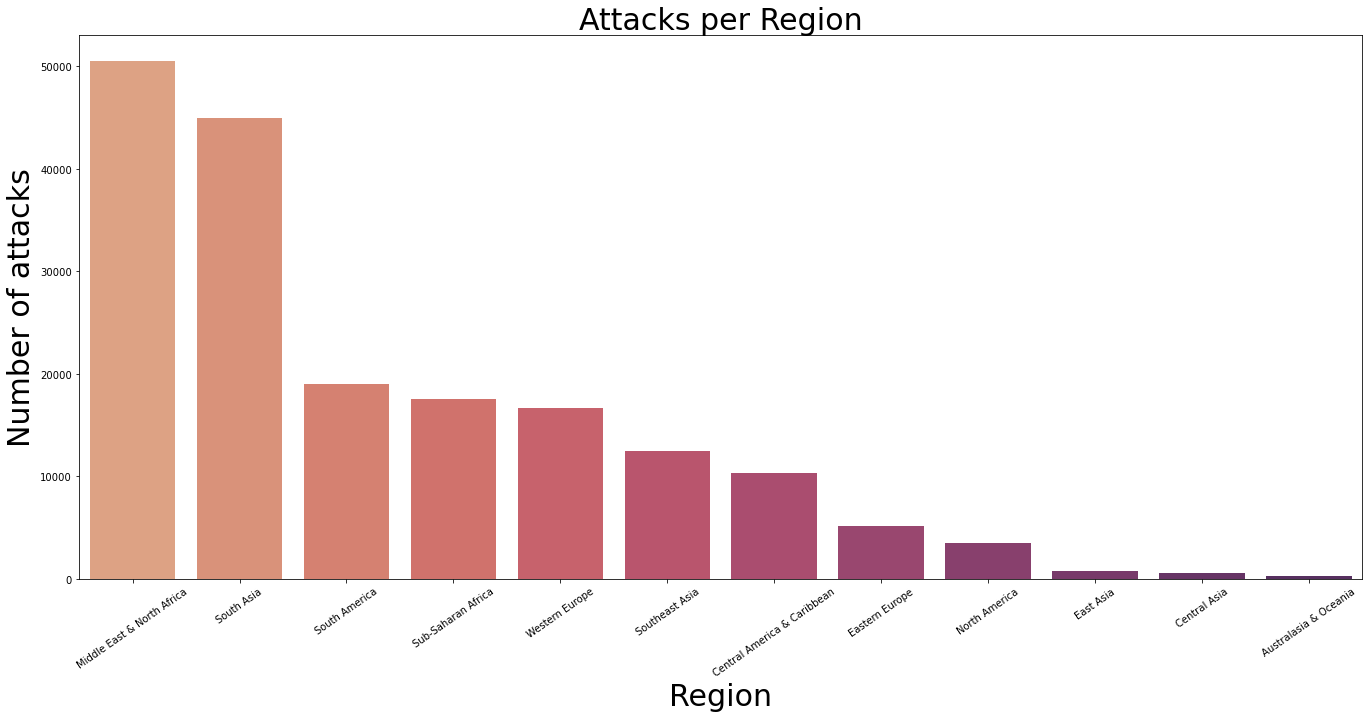

In [16]:
# Attacks per Region
plt.subplots(figsize=(23,10))
sns.barplot(df['Region'].value_counts()[:15].index,df['Region'].value_counts()[:15].values,palette='flare')
plt.xticks(rotation = 35)
plt.title("Attacks per Region",fontsize=30)
plt.xlabel("Region",fontsize=30)
plt.ylabel("Number of attacks",fontsize=30)
plt.show()

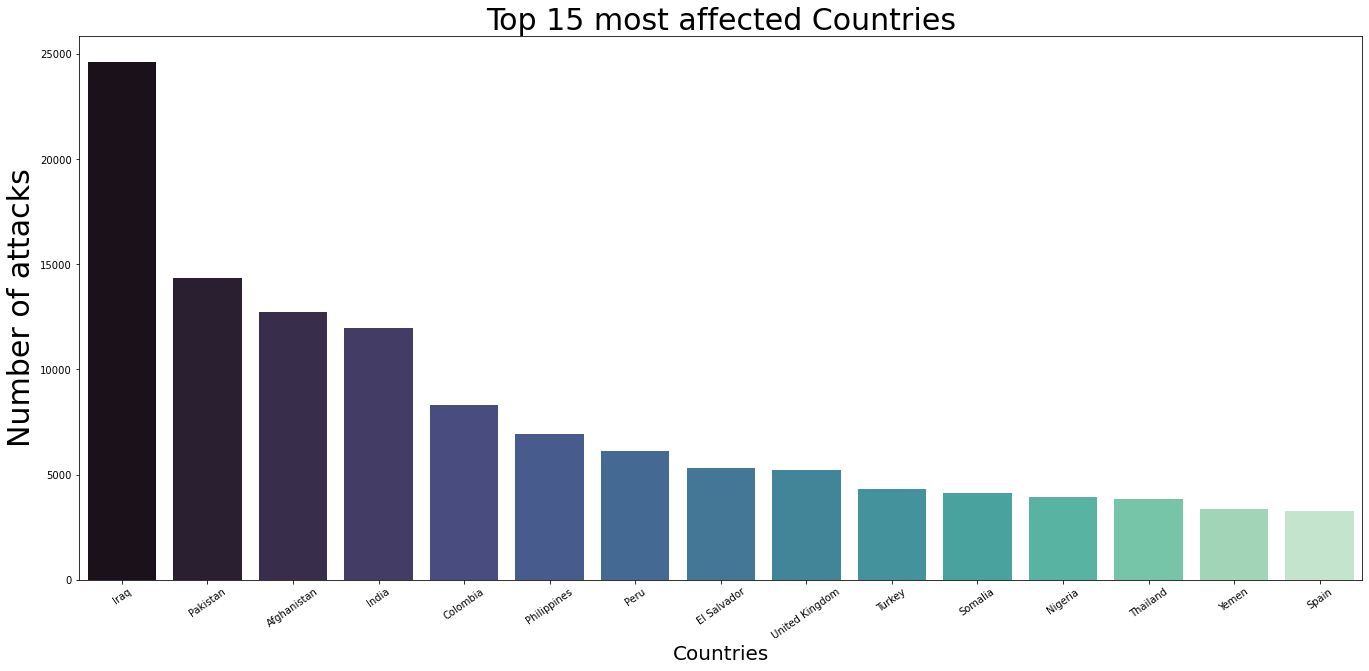

In [17]:
#Top 15 affected Countries
plt.subplots(figsize=(23,10))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='mako')
plt.xticks(rotation = 35)
plt.title("Top 15 most affected Countries",fontsize=30)
plt.xlabel("Countries",fontsize=20)
plt.ylabel("Number of attacks",fontsize=30)
plt.show()

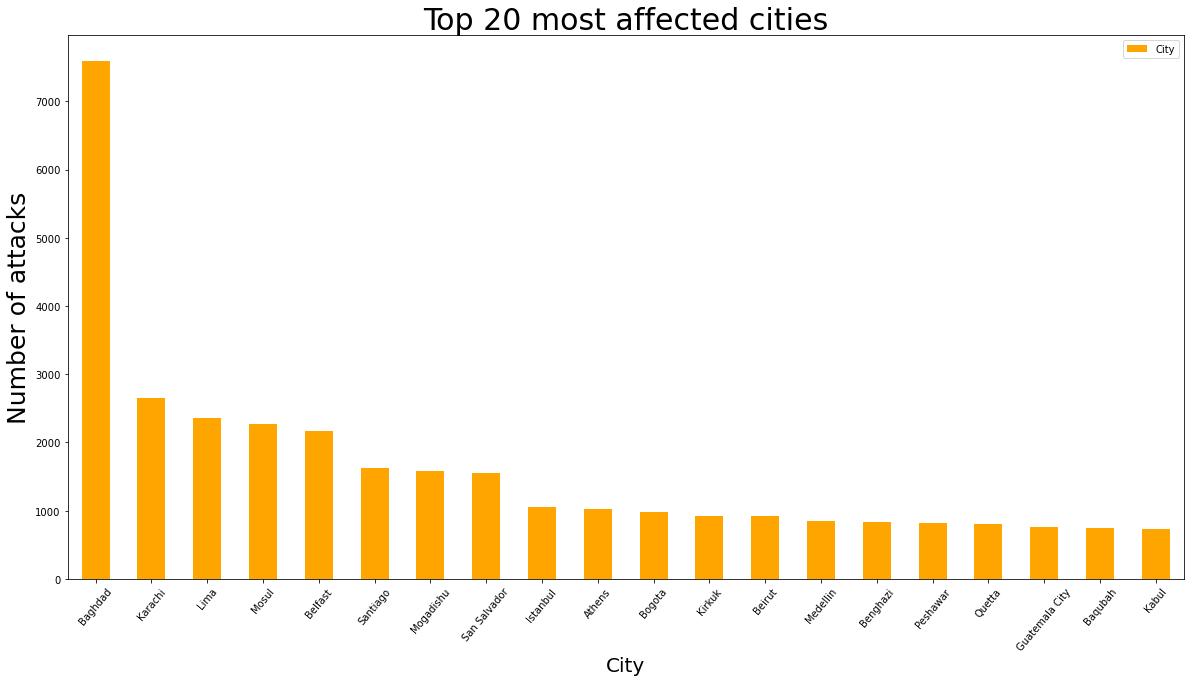

In [18]:
#Top 20 affected cities
df['City'].value_counts().to_frame().drop('Unknown').sort_values('City',axis=0,ascending=False).head(20).plot(kind='bar',figsize=(20,10),color='orange')
plt.xticks(rotation = 50)
plt.title("Top 20 most affected cities",fontsize=30)
plt.xlabel("City",fontsize=20)
plt.ylabel("Number of attacks",fontsize=25)
plt.show()

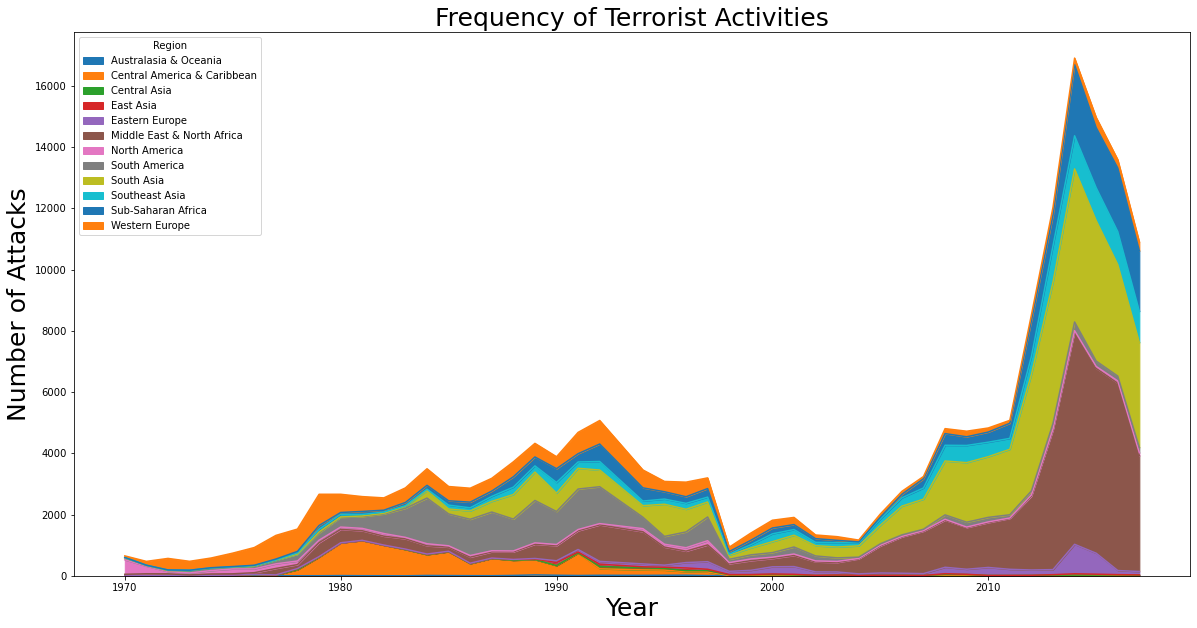

In [19]:
#Area-plot of terrorist attacks per year  
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(20,10))
plt.title('Frequency of Terrorist Activities',fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.show()

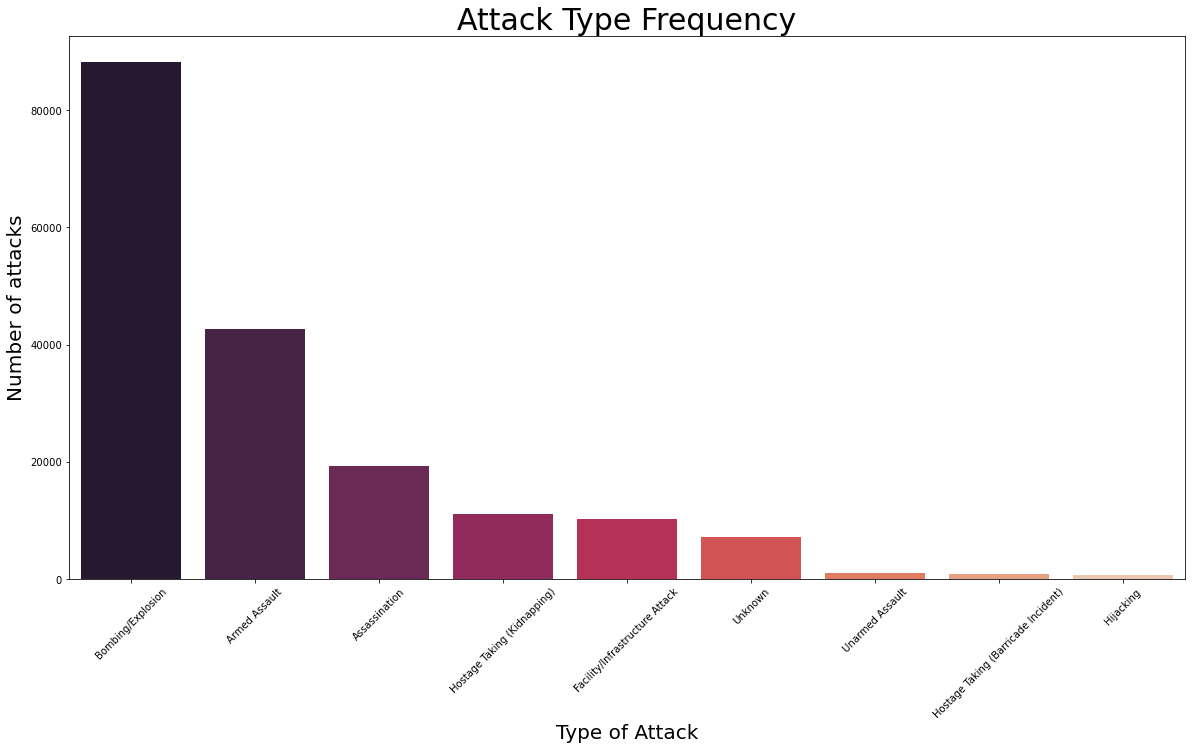

In [20]:
#Attack Type Used
plt.subplots(figsize=(20,10))
sns.countplot(df["AttackType"],order=df['AttackType'].value_counts().index,palette="rocket");
plt.xticks(rotation = 45)
plt.title("Attack Type Frequency",fontsize=30)
plt.xlabel("Type of Attack",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)
plt.show()

#### Creating a pie chart on distribution of terrorist groups

In [54]:
print(df['Group'].unique())
df['Group'].value_counts()

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']


Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: Group, Length: 3537, dtype: int64

In [70]:
grp_flt =df['Group'].apply(lambda x: x if x in ['Unknown','Taliban','Islamic State of Iraq and the Levant (ISIL)',
                                                'Shining Path (SL)','Farabundo Marti National Liberation Front (FMLN)'] else 'Others')
grp = grp_flt.value_counts().tolist()

In [71]:
grp_flt.unique()

array(['Others', 'Unknown', 'Shining Path (SL)',
       'Farabundo Marti National Liberation Front (FMLN)', 'Taliban',
       'Islamic State of Iraq and the Levant (ISIL)'], dtype=object)

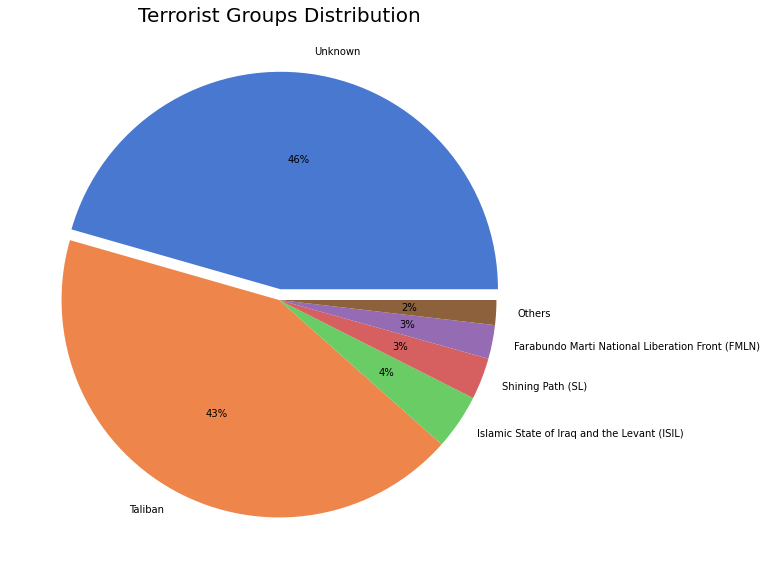

In [85]:
grp_label = ['Unknown','Taliban','Islamic State of Iraq and the Levant (ISIL)','Shining Path (SL)',
             'Farabundo Marti National Liberation Front (FMLN)','Others']
color = sns.color_palette('muted')
explode = [0.05, 0, 0, 0, 0,0]
plt.figure(figsize=(20, 10))
plt.title('Terrorist Groups Distribution',fontsize=20)
plt.pie(grp, labels = grp_label, colors = color, explode = explode, autopct='%.0f%%')
plt.show()

### Conclusion

#### After Analyzing the data we can conclude that

• Most affected region is Middle East and North Africa

• Most affected country is Iraq

• Most attacked city is Baghdad , the capital city of Iraq

 From the data, we can also say that no. of attacks have exponentially increased from year 2012 to 2014 & then again decreased every year

• Terrorist have mostly used Bombing/Explosion💥 in attacks

• Terrorist attacks are mostly done by Unknown Terrorist groups, followed by Taliban, ISIL,SL,etc.

####  Done by Soumyadip Tikader